In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use("/Users/tjwilli/jupyter.mplstyle")
from IPython.display import Audio

In [5]:
def orbit_func(vr0=0,r0=1,dt=0.01,tstop=10):
    t = np.arange(0, tstop * 2 * np.pi, dt)
    r,phi,rdot,phidot = ( np.zeros_like( t ) for i in range(4) )
    
    r[0] = r0
    rdot[0] = vr0
    phi[0] = 0
    
    for i in range(1,t.size):
        phidot[i] = 1 / r[i-1]**2
        phi[i] = phi[i-1] + phidot[i] * dt
        rdot[i] = rdot[i-1] + ( 1 / r[i-1]**3 - 1 / r[i-1]**2. ) * dt
        r[i] = r[i-1] + rdot[i] * dt
        
    result = {
        't':t,
        'r':r,
        'rdot':rdot,
        'phi':phi,
        'phidot':phidot
    }
    
    return result


def racc(r):
    return 1 / r**3 - 2*r

def orbit_func_harmonic(vr0=0,r0=1,dt=0.01,tstop=10):
    t = np.arange(0, tstop * 2 * np.pi, dt)
    r,phi,rdot,phidot = ( np.zeros_like( t ) for i in range(4) )
    
    r[0] = r0
    rdot[0] = vr0
    phi[0] = 0
    
    for i in range(1,t.size):
        #phidot[i] = 1 / r[i-1]**2
        #phi[i] = phi[i-1] + phidot[i] * dt
        #rdot[i] = rdot[i-1] + ( 1 / r[i-1]**3 - 1 / r[i-1]**2. ) * dt
        #r[i] = r[i-1] + rdot[i] * dt
        rdot[i] = rdot[i-1] + racc(r[i-1]) * dt
        r[i] = r[i-1] + rdot[i] * dt
        phi[i] = phi[i-1] + dt / r[i]**2
        
    result = {
        't':t,
        'r':r,
        'rdot':rdot,
        'phi':phi
    }
    
    return result

def get_filename(opts,meta=''):
    fname = 'orbit' + meta + '_'
    for key,val in opts.items():
        ival = format(val,'0.2f').replace('.','_')
        iopt = '{}_{}_'.format(key,ival)
        fname = fname + iopt
    fname = fname[:-1] + '.mp4'
    return fname

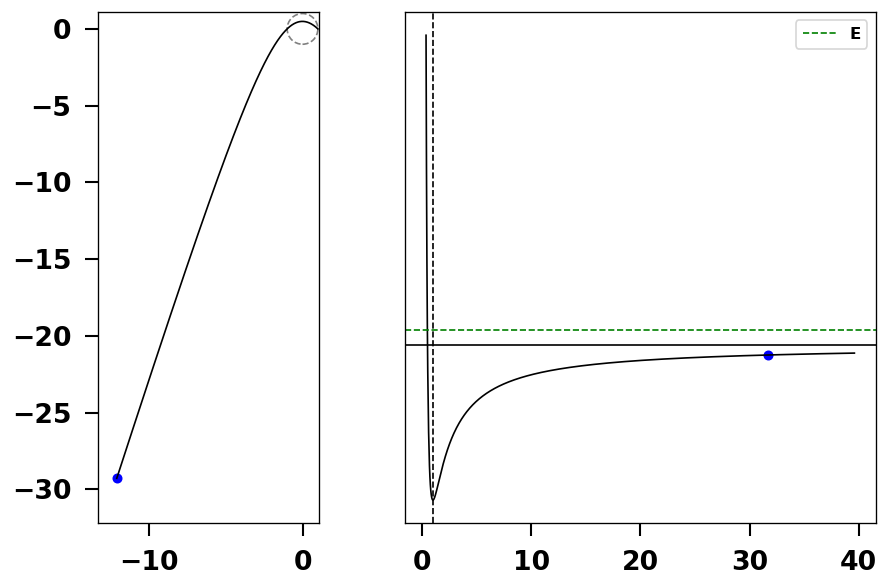

In [20]:
opts = {
    'vr0': -1.05,
    'r0' : 1,
    'dt' : 0.01,
    'tstop' : 10
}

fname = "animation/orbits/" + get_filename(opts,meta='_ueff')
result = orbit_func(**opts)

r = result['r']
phi = result['phi']
x = r * np.cos(phi)
y = r * np.sin(phi)

fig = plt.figure( figsize=(8,5) )
ax1 = plt.subplot(1,2,1)
xmin = min(1.1*x.min(),-1.1)
xmax = max(1.1*x.max(),1.1)
ymin = min(1.1*y.min(),-1.1)
ymax = max(1.1*y.max(),1.1)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_aspect('equal')
orbit, = ax1.plot( [],[],c='k' )
obj = ax1.scatter( [],[],c='blue' )
circ = plt.Circle(xy=(0,0),radius=1,fill='',ls='--',color='gray')
ax1.add_artist(circ)

ax2 = plt.subplot(1,2,2)
rplot = np.linspace( 0.75 * r.min(), 1.25 * r.max(), 1000 )
ueff = 0.5 / rplot**2 - 1/rplot
E0 = 0.5 * opts['vr0']**2 + 0.5/opts['r0']**2 - 1 / opts['r0']
ueffplot, = ax2.plot(rplot,ueff,c='k')
ueffmarker = ax2.scatter( [],[],c='blue' )
ax2.axvline(1,c='k',ls='--')
ax2.axhline( E0,c='green',ls='--',label='E')
ax2.axhline(0,c='k')
ax2.yaxis.set_visible(False)
ax2.legend()
plt.tight_layout()

def init():
    orbit.set_data([], [])
    obj.set_offsets( np.array( [[],[]]).T )
    ueffmarker.set_offsets( np.array( [[],[]]).T )
    return (orbit,obj,ueffmarker)

def animate(i):
    orbit.set_data( x[:i],y[:i] )
    obj.set_offsets( np.array( [[x[i]],[y[i]]] ).T )
    iueff = 0.5 / r[i]**2 - 1/ r[i]
    ueffmarker.set_offsets( np.array( [[r[i]],[iueff]]).T )
    return (orbit,obj,ueffmarker)

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=x.size, interval=15, blit=True)

anim.save(fname)

In [4]:
fname

'animation/orbits/orbit_ueff_vr0_-1_1_r0_1_dt_0_01_tstop_20.mp4'

In [42]:
iueff = 0.5 / r**2 - 1/ r

In [19]:
#plt.plot(r,iueff)
r0 = 0.1
E0 = 0.5 * 0*2 + 0.5/r0**2 - 1 / r0
print(E0)

39.99999999999999


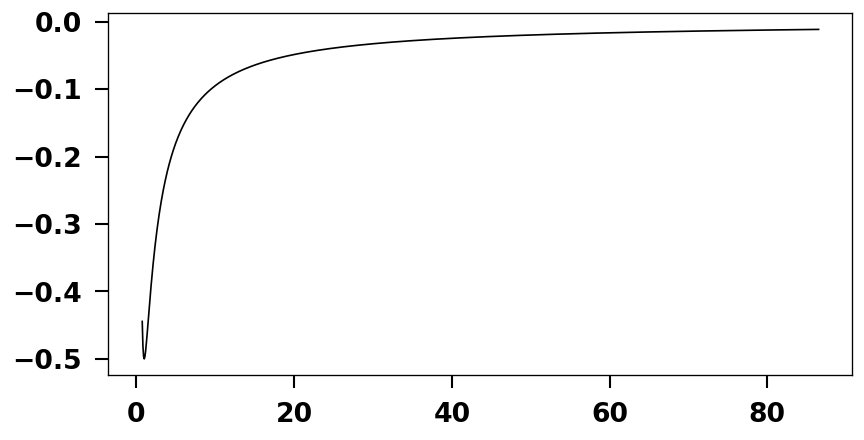

In [19]:
plt.plot(rplot,ueff,c='k')

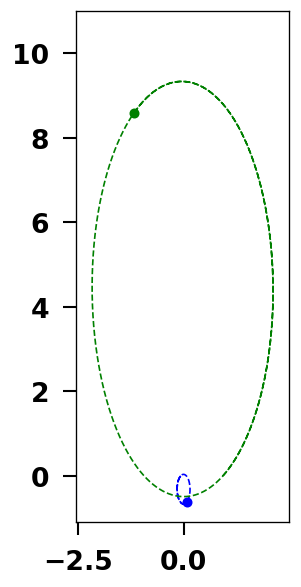

In [19]:
opts = {
    'vr0': 0.9,
    'r0' : 1,
    'dt' : 0.01,
    'tstop' : 20,
    'mrat' : 1/15
}

fname = "animation/orbits/" + get_filename(opts,meta='_twobodies')
rat = opts.pop('mrat')
result = orbit_func(**opts)

r = result['r']
phi = result['phi']
x = r * np.cos(phi)
y = r * np.sin(phi)
x1 = -rat * x
y1 = -rat * y
x2 = (1-rat) * x
y2 = (1-rat) * y

fig = plt.figure( figsize=(8,5) )
ax1 = plt.gca()
xmin = min(1.1*x.min(),-1.1)
xmax = max(1.1*x.max(),1.1)
ymin = min(1.1*y.min(),-1.1)
ymax = max(1.1*y.max(),1.1)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_aspect('equal')
orb1, = ax1.plot( [],[],c='blue',ls='--' )
obj1 = ax1.scatter( [],[],c='blue' )
orb2, = ax1.plot( [],[],c='green',ls='--' )
obj2 = ax1.scatter( [],[],c='green' )

plt.tight_layout()

def init():
    orb1.set_data([], [])
    obj1.set_offsets( np.array( [[],[]]).T )
    orb2.set_data([], [])
    obj2.set_offsets( np.array( [[],[]]).T )
    return (orb1,orb2,obj1,obj2)

def animate(i):
    orb1.set_data( x1[:i],y1[:i] )
    orb2.set_data( x2[:i],y2[:i] )
    obj1.set_offsets( np.array( [[x1[i]],[y1[i]]] ).T )
    obj2.set_offsets( np.array( [[x2[i]],[y2[i]]] ).T )
    return (orb1,orb2,obj1,obj2)

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=x.size, interval=5, blit=True)

anim.save(fname)

In [8]:
x2

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
format(0.16662,'0.2f')

'0.17'

###

Saved file to  animation/orbits/orbit_harmonic_vr0_5_00_r0_0_84_dt_0_01_tstop_2_00.mp4


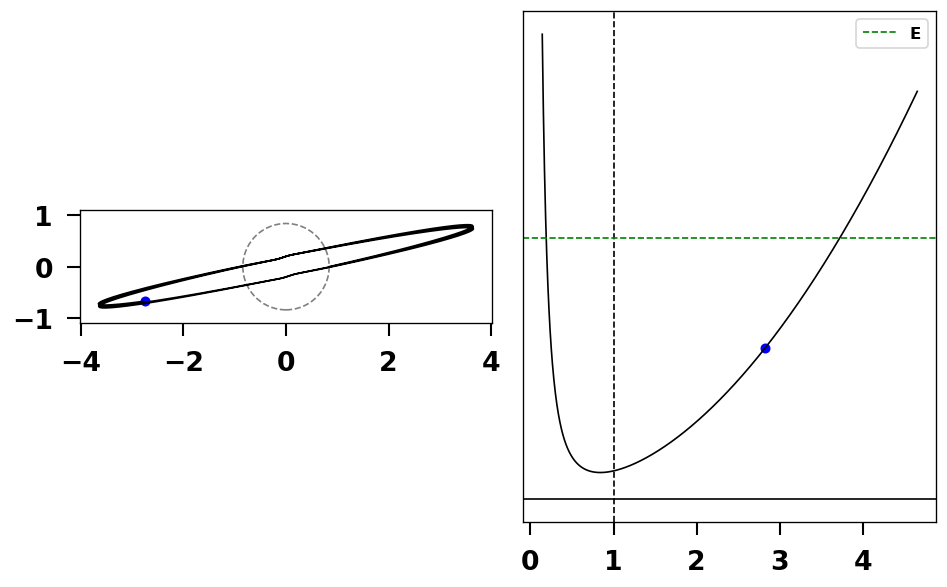

In [23]:
r0 = (1/2)**(1/4)
opts = {
    'vr0': 5,
    'r0' : r0,
    'dt' : 0.01,
    'tstop' : 2
}

fname = "animation/orbits/" + get_filename(opts,meta='_harmonic')
result = orbit_func_harmonic(**opts)

r = result['r']
phi = result['phi']
x = r * np.cos(phi)
y = r * np.sin(phi)

fig = plt.figure( figsize=(8,5) )
ax1 = plt.subplot(1,2,1)
xmin = min(1.1*x.min(),-1.1)
xmax = max(1.1*x.max(),1.1)
ymin = min(1.1*y.min(),-1.1)
ymax = max(1.1*y.max(),1.1)
ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)
ax1.set_aspect('equal')
orbit, = ax1.plot( [],[],c='k' )
obj = ax1.scatter( [],[],c='blue' )
circ = plt.Circle(xy=(0,0),radius=r0,fill='',ls='--',color='gray')
ax1.add_artist(circ)

ax2 = plt.subplot(1,2,2)
rplot = np.linspace( 0.75 * r.min(), 1.25 * r.max(), 1000 )
ueff = 0.5 / rplot**2 + rplot**2
E0 = 0.5 * opts['vr0']**2 + 0.5/opts['r0']**2 + opts['r0']**2
ueffplot, = ax2.plot(rplot,ueff,c='k')
ueffmarker = ax2.scatter( [],[],c='blue' )
ax2.axvline(1,c='k',ls='--')
ax2.axhline( E0,c='green',ls='--',label='E')
ax2.axhline(0,c='k')
ax2.yaxis.set_visible(False)
ax2.legend()
plt.tight_layout()

def init():
    orbit.set_data([], [])
    obj.set_offsets( np.array( [[],[]]).T )
    ueffmarker.set_offsets( np.array( [[],[]]).T )
    return (orbit,obj,ueffmarker)

def animate(i):
    orbit.set_data( x[:i],y[:i] )
    obj.set_offsets( np.array( [[x[i]],[y[i]]] ).T )
    iueff = 0.5 / r[i]**2 + r[i]**2
    ueffmarker.set_offsets( np.array( [[r[i]],[iueff]]).T )
    return (orbit,obj,ueffmarker)

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=x.size, interval=15, blit=True)

anim.save(fname)
print("Saved file to ", fname)

23700862.934372183

In [3]:
Audio("buzzer3_x.wav",autoplay=True)